### **Preparation**


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import copy
import math
import csv
from collections import deque
from google.colab import files

### **Input Data**
load the training data file
each row $\{ (x^{(i)}, y^{(i)}, l^{(i)}) \}$ of the data consists of a 2-dimensional point $(x, y)$ with its label $l$  
$x, y \in \mathbb{R}$ and $l \in \{0, 1\}$

In [2]:
uploaded = files.upload()

Saving mnist_test.csv to mnist_test.csv


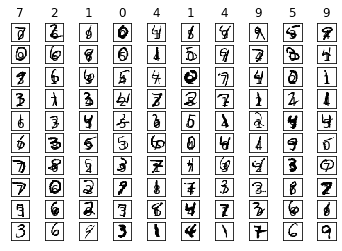

784
[0. 0. 0. ... 0. 0. 0.]
10000
784
10000
784


In [20]:
file_data   = "mnist_test.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data)   #10000개
count       = 0     # count for the number of images

#
# make a matrix each column of which represents an images in a vector form 
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)   #784 * 10000 matrix
list_label  = np.empty(num_image, dtype=int)                            #10000 vector

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])

    list_label[count]       = label
    list_image[:, count]    = im_vector    

    count += 1

# 
# plot first 100 images out of 10,000 with their labels
# 
f1 = plt.figure(1)

for i in range(100):

    label       = list_label[i]
    im_vector   = list_image[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(10, 10, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()
print(len(list_image[:,2])) #784
print(list_image[0])
print(len(list_image[1])) #10000
print(len(list_image))    #784
print(num_image)          #10000
print(len(im_vector))     #784

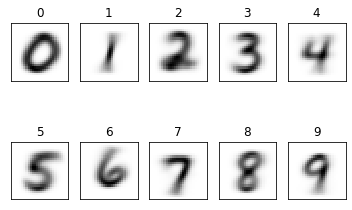

In [29]:
avg_image = np.zeros([784,10])
avg_label = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

for i in range(0, 10000):
  index = list_label[i] #index를 할당
  avg_image[:,index] += list_image[:, i] / 256

##출력부분
for i in range(10):
    label       = avg_label[i]
    im_vector   = avg_image[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(2, 5, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

In [0]:
data = np.genfromtxt("data-nonlinear.txt", delimiter=',')
x = data[:, 0]
y = data[:, 1]
label = data[:, 2]
x_label0 = x[label == 0]
x_label1 = x[label == 1]
y_label0 = y[label == 0]
y_label1 = y[label == 1]

iters = deque()
accuracys1 = deque()
accuracys2 = deque()
accuracys3 = deque()
accuracys4 = deque()
accuracys5 = deque()
train_costs1 = deque()
train_costs2 = deque()
train_costs3 = deque()
train_costs4 = deque()
train_costs5 = deque()
theta_datas1 = deque()
theta_datas2 = deque()
theta_datas3 = deque()
theta_datas4 = deque()
theta_datas5 = deque()
lambda_datas = deque()
#print(label[57])
#print(label[58])
#print(type(x))
#print(y_label0)
#print(type(x_label0))
#print(len(x)) #118
#print(y)
#print(label)
#print(len(x_label0)) #60
#print(len(x_label1)) #58

### **Logistic Regression**
1) non-Linear Model
<br>
$\ z =  g(x, y; \theta) = \sum_{i=0}^{9} \sum_{j=0}^{9} \theta_{i,j} x^{i} y^{j}$  
$\sigma(z) = \frac{1}{1 + \exp(-z)}$
<br>  
2) Objective Function
<br>
$J(\theta) = \frac{1}{m} \sum_{i=1}^m \left[ - l^{(i)} \log(\sigma(g(x^{(i)}, y^{(i)}; \theta))) - (1 - l^{(i)}) \log(1 - \sigma(g(x^{(i)}, y^{(i)}; \theta))) \right] + \frac{\lambda}{2} \sum_{i=0}^{9} \sum_{j=0}^{9} \theta_{i,j}^2$
<br>  
3) Gradient Descent
<br>
$\theta_{i, j}^{(t+1)} = \theta_{i, j}^{(t)} - \alpha \left[ \frac{1}{m} \sum_{i=1}^{m} (\sigma(g(x^{(i)}, y^{(i)}; \theta^{(t)})) - l^{(i)}) \frac{\partial g(x^{(i)}, y^{(i)}; \theta^{(t)})}{\partial \theta_{i, j}} + \lambda \theta_{i, j}^{(t)} \right]$, for all $i, j$  
<br>
4) HyperParameters Setting
<br>
$\ lr = 3*10^{-1}$



In [0]:
def sigmoidFunction(z):
  result = 1/(1 + np.exp(-z))
  return result

In [0]:
def gFunction(x_data, y_data, theta_data):  #단일 x,y와 모든 theta 계산
  result = 0
  for i in range(0, 10):
    for j in range(0, 10):
      result += theta_data[i][j] * np.power(x_data, i) * np.power(y_data, j)
  return result

In [0]:
def objectiveFunction(x_data, y_data, class_data, theta_data, lambda_data):
  cost = 0
  predictions = deque()
  for i in range(0, 118):
    estimate = gFunction(x_data[i], y_data[i], theta_data)
    estimate = sigmoidFunction(estimate)
    #print(estimate)
    #print("Estimate",estimate)
    predictions.append((-class_data[i]*np.log(estimate)) - (1-class_data[i])*np.log(1-estimate))
    #print("predictions",predictions)
  cost = np.sum(predictions) / 118                          #data fidelity term
  cost += lambda_data / 2 * np.sum(np.square(theta_data))   #regularization term
  #print("Cost출력",cost)
  return cost

In [0]:
def gradientDescent(x_data, y_data, class_data, theta_data, lambda_data):
  lr = 3e-1
  for i in range(0, 10):
    for j in range(0, 10):
      estimate = 0
      for k in range(0, 118):
        estimate += (sigmoidFunction(gFunction(x_data[k], y_data[k], theta_data)) - class_data[k]) * np.power(x_data[k],i) * np.power(y_data[k],j)
      theta_data[i][j] -= lr * (estimate/118 + lambda_data * theta_data[i][j])
  return theta_data

In [0]:
def main():
  theta_data = np.zeros([10,10])  #Initialization
  """
  for iter in range(0, 250):    
    lambda_data = 0.00001
    train_value = objectiveFunction(x, y, label, theta_data, lambda_data)
    train_costs1.append(train_value)
    theta_data = gradientDescent(x, y, label, theta_data, lambda_data)
    check = 0
    for i in range(0, 60):
      if gFunction(x[i], y[i], theta_data) >= 0:
        check += 1
    for i in range(60, 118):
      if gFunction(x[i], y[i], theta_data)  < 0:
        check += 1
    accuracy = check / 118 * 100
    accuracys1.append(accuracy)
    iters.append(iter)
    theta_datas1.append(theta_data)
    lambda_datas.append(lambda_data)
  """
  ## 2번째 람다 실험
  theta_data = np.zeros([10,10])  #Initialization
  for iter in range(0, 250):    
    check = 0
    for i in range(0, 60):
      if gFunction(x[i], y[i], theta_data) >= 0:
        check += 1
    for i in range(60, 118):
      if gFunction(x[i], y[i], theta_data)  < 0:
        check += 1
    accuracy = check / 118 * 100
    accuracys2.append(accuracy)

    lambda_data = 0.0003
    train_value = objectiveFunction(x, y, label, theta_data, lambda_data)
    train_costs2.append(train_value)
    theta_data = gradientDescent(x, y, label, theta_data, lambda_data)
    theta_datas2.append(theta_data)
    lambda_datas.append(lambda_data)
  """
  ## 3번째 람다 실험
  theta_data = np.zeros([10,10])  #Initialization
  for iter in range(0, 250):    
    check = 0
    for i in range(0, 60):
      if gFunction(x[i], y[i], theta_data) >= 0:
        check += 1
    for i in range(60, 118):
      if gFunction(x[i], y[i], theta_data)  < 0:
        check += 1
    accuracy = check / 118 * 100
    accuracys3.append(accuracy)

    lambda_data = 1
    train_value = objectiveFunction(x, y, label, theta_data, lambda_data)
    train_costs3.append(train_value)
    theta_data = gradientDescent(x, y, label, theta_data, lambda_data)
    theta_datas3.append(theta_data)
    lambda_datas.append(lambda_data)
  """
if __name__ == "__main__":
  main()

### **1. Plot the training data**

Plotting the training data


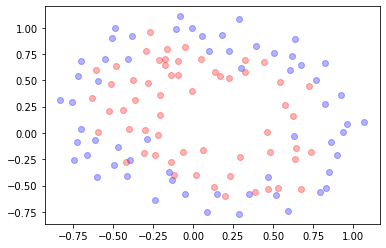

In [0]:
print("Plotting the training data")
plt.figure()
plt.scatter(x_label0, y_label0, alpha=0.3, c='b')
plt.scatter(x_label1, y_label1, alpha=0.3, c='r')
plt.show()

### **2. Plotting the Training Error with Regularizations**

Plotting the Training Error


ValueError: ignored

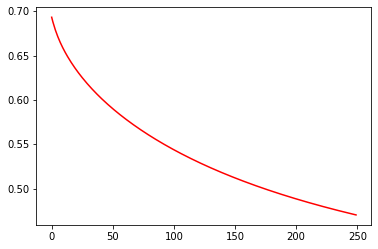

In [0]:
print("Plotting the Training Error")
plt.plot(iters, train_costs1, 'r')
plt.plot(iters, train_costs2, 'g')
plt.plot(iters, train_costs3, 'b')
plt.xlabel('iteration')
plt.ylabel('Traing Error')
plt.show()

In [0]:
print(train_costs2)

deque([0.6931471805599454, 0.6878832113299839, 0.6831908007480447, 0.67896523151624, 0.6751230171528619, 0.6715978461117332, 0.6683371111563989, 0.6652990382172204, 0.6624503658022974, 0.6597644991061389, 0.657220057483535, 0.654799739524018, 0.6524894401495327, 0.650277565400313, 0.6481545011156171, 0.64611220084262, 0.6441438658552308, 0.6422436962334968, 0.640406696745657, 0.6386285250129285, 0.6369053723309422, 0.6352338697509442, 0.6336110137360379, 0.6320341070206686, 0.6305007113076636, 0.6290086092082183, 0.6275557734214651, 0.6261403416040225, 0.624760595728579, 0.6234149449988056, 0.6221019115945624, 0.6208201186808568, 0.6195682802372773, 0.6183451923600776, 0.6171497257631083, 0.6159808192613306, 0.6148374740654273, 0.6137187487509853, 0.6126237547930427, 0.6115516525782198, 0.6105016478234919, 0.6094729883439184, 0.6084649611221452, 0.607476889640813, 0.6065081314456354, 0.6055580759121983, 0.604626142193812, 0.6037117773311628, 0.6028144545073162, 0.6019336714338971, 0.60

### **3. Displaying the values of the chosen Regularizations**

In [0]:
lambda1 = lambda_datas[0]
lambda2 = lambda_datas[250]
lambda3 = lambda_datas[500]
print("lambda1 :\033[31m",lambda1,"\033[0m")
print("lambda2 :\033[32m",lambda2,"\033[0m")
print("lambda3 :\033[34m",lambda3,"\033[0m")

lambda1 : 1e-05 
lambda2 : 0.01 
lambda3 : 1 


  
    
      
        
          
            

### **4. Plotting the Training Accuracy with Regularizations**
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>


Plotting the Training Accuracy


ValueError: ignored

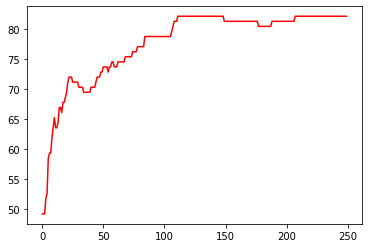

In [0]:
print("Plotting the Training Accuracy")
plt.plot(iters, accuracys1, 'r')
plt.plot(iters, accuracys2, 'g')
plt.plot(iters, accuracys3, 'b')
plt.xlabel('iteration')
plt.ylabel('Training Accuracy')
plt.show()

In [0]:
print(accuracys2)

deque([50.847457627118644, 49.152542372881356, 49.152542372881356, 49.152542372881356, 51.69491525423729, 52.54237288135594, 58.47457627118644, 59.32203389830508, 59.32203389830508, 61.86440677966102, 63.559322033898304, 64.40677966101694, 64.40677966101694, 62.71186440677966, 64.40677966101694, 66.94915254237289, 66.94915254237289, 66.94915254237289, 67.79661016949152, 67.79661016949152, 66.94915254237289, 69.49152542372882, 70.33898305084746, 72.03389830508475, 72.03389830508475, 72.88135593220339, 72.03389830508475, 71.1864406779661, 71.1864406779661, 71.1864406779661, 71.1864406779661, 71.1864406779661, 70.33898305084746, 70.33898305084746, 70.33898305084746, 70.33898305084746, 69.49152542372882, 69.49152542372882, 69.49152542372882, 69.49152542372882, 69.49152542372882, 70.33898305084746, 70.33898305084746, 70.33898305084746, 70.33898305084746, 70.33898305084746, 70.33898305084746, 71.1864406779661, 72.88135593220339, 72.88135593220339, 72.88135593220339, 72.88135593220339, 72.881

### **5. Final Training Accuracy with Regularizations**

In [0]:
print("Final Training Accuracy :\033[31m",accuracys1[-1],"% \033[0m")
print("Final Training Accuracy :\033[32m",accuracys2[-1],"% \033[0m")
print("Final Training Accuracy :\033[34m",accuracys3[-1],"% \033[0m")

Final Training Accuracy : 82.20338983050848 % 
Final Training Accuracy : 82.20338983050848 % 
Final Training Accuracy : 60.16949152542372 % 


### **6. Plotting the Optimal Classifer superimposed on the Training Data**

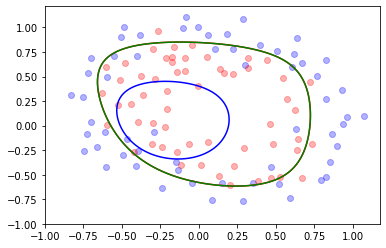

In [0]:
theta_1 = theta_datas1[-1]
theta_2 = theta_datas2[-1]
theta_3 = theta_datas3[-1]

Xmesh, Ymesh = np.meshgrid(np.linspace(-1.0, 1.0, 300), np.linspace(-1.0, 1.0, 300))

Z1 = gFunction(Xmesh, Ymesh, theta_1)
Z2 = gFunction(Xmesh, Ymesh, theta_2)
Z3 = gFunction(Xmesh, Ymesh, theta_3)

fig = plt.figure()
levels = [0]
graph1 = plt.contour(Xmesh, Ymesh, Z1, levels, colors = 'red')
graph2 = plt.contour(Xmesh, Ymesh, Z2, levels, colors = 'green')
graph3 = plt.contour(Xmesh, Ymesh, Z3, levels, colors = 'blue')
graph4 = plt.scatter(x_label0, y_label0, alpha=0.3, c='b')
graph5 = plt.scatter(x_label1, y_label1, alpha=0.3, c='r')
plt.show()